Pen-based Recognition of Handwritten Digits

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import time
from mpl_toolkits.mplot3d import Axes3D

Загрузка данных

In [2]:
df_test = pd.read_csv('pendigits.tes', header=None)
df_train = pd.read_csv('pendigits.tra', header=None)

df = pd.concat([df_train, df_test])

2. Произвести масштабирование признаков (scaling).

In [3]:
x_train = df_train.iloc[:, :-1]
y_train = df_train.drop(df.iloc[:, :-1], axis=1)
x_test = df_test.iloc[:, :-1]
y_test = df_test.drop(df.iloc[:, :-1], axis=1)
x_data = df.iloc[:, :-1]
y_data = df.drop(df.iloc[:, :-1], axis=1)

scaler_x = preprocessing.StandardScaler()
x_data = pd.DataFrame(scaler_x.fit_transform(x_data), columns=x_data.columns)
x_train = pd.DataFrame(scaler_x.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler_x.fit_transform(x_test), columns=x_test.columns)

Масштабирование производится с помощью стандартизации - математическое ожидание каждой колонки становится равным 0, а его стандратное отклонение становится равным 1. Проверим результат стандартизации:

In [4]:
print('\nМатематическое ожидание для каждой из колонок x_data:')
print(x_data.mean())

print('\nСтандартное отклонение для каждой из колонок x_data:')
print(x_data.std())


Математическое ожидание для каждой из колонок x_data:
0    -5.947046e-17
1    -4.007792e-16
2    -1.551403e-17
3     8.791286e-17
4     4.654210e-17
5     1.370406e-16
6     6.270255e-17
7    -2.117019e-17
8    -6.076330e-17
9    -9.373062e-17
10   -7.239882e-17
11    5.171345e-17
12    9.049853e-17
13   -9.825555e-17
14   -2.068538e-17
15    2.117019e-17
dtype: float64

Стандартное отклонение для каждой из колонок x_data:
0     1.000045
1     1.000045
2     1.000045
3     1.000045
4     1.000045
5     1.000045
6     1.000045
7     1.000045
8     1.000045
9     1.000045
10    1.000045
11    1.000045
12    1.000045
13    1.000045
14    1.000045
15    1.000045
dtype: float64


1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.

In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

3. С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков.

## Perceptron

In [6]:
perceptron = Perceptron(tol=1e-3, random_state=0, verbose=True)
perceptron.fit(x_train, y_train.ravel())

perceptron_y_pedict = perceptron.predict(x_test)

-- Epoch 1
Norm: 22.66, NNZs: 16, Bias: -38.000000, T: 7494, Avg. loss: 0.238819
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 27.20, NNZs: 16, Bias: -47.000000, T: 14988, Avg. loss: 0.232628
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 29.25, NNZs: 16, Bias: -53.000000, T: 22482, Avg. loss: 0.193004
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 30.40, NNZs: 16, Bias: -54.000000, T: 29976, Avg. loss: 0.241605
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 32.16, NNZs: 16, Bias: -57.000000, T: 37470, Avg. loss: 0.249466
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 31.28, NNZs: 16, Bias: -61.000000, T: 44964, Avg. loss: 0.225293
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 33.56, NNZs: 16, Bias: -59.000000, T: 52458, Avg. loss: 0.235326
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 32.50, NNZs: 16, Bias: -59.000000, T: 59952, Avg. loss: 0.245264
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
-- Epoch 1
Norm: 33.

## MLPClassifier

In [7]:
mlp = MLPClassifier(random_state=1, verbose=True)
mlp.fit(x_train, y_train.ravel())

mlp_y_pedict = mlp.predict(x_test)

Iteration 1, loss = 1.79152718


Iteration 2, loss = 1.00077296
Iteration 3, loss = 0.62071431
Iteration 4, loss = 0.43091469
Iteration 5, loss = 0.32410561
Iteration 6, loss = 0.25808057
Iteration 7, loss = 0.21434105
Iteration 8, loss = 0.18292057
Iteration 9, loss = 0.15971887
Iteration 10, loss = 0.14107922
Iteration 11, loss = 0.12627107
Iteration 12, loss = 0.11453265
Iteration 13, loss = 0.10427568
Iteration 14, loss = 0.09609203
Iteration 15, loss = 0.08881384
Iteration 16, loss = 0.08267081
Iteration 17, loss = 0.07761883
Iteration 18, loss = 0.07243808
Iteration 19, loss = 0.06828842
Iteration 20, loss = 0.06464783
Iteration 21, loss = 0.06097733
Iteration 22, loss = 0.05807988
Iteration 23, loss = 0.05521490
Iteration 24, loss = 0.05271314
Iteration 25, loss = 0.05036828
Iteration 26, loss = 0.04802370
Iteration 27, loss = 0.04608407
Iteration 28, loss = 0.04408542
Iteration 29, loss = 0.04265521
Iteration 30, loss = 0.04098525
Iteration 31, loss = 0.03942020
Iteration 32, loss = 0.03793526
Iteration 33, l

4. Проверить точность модели по тестовой выборке.

In [8]:
print(f'Точность перцептрона: {accuracy_score(y_test, perceptron_y_pedict)}')
print(f'Точность многослойного перцептрона: {accuracy_score(y_test, mlp_y_pedict)}')

Точность перцептрона: 0.8716409376786736
Точность многослойного перцептрона: 0.9679817038307604


5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

In [9]:
# Эффективность работы перцептрона
def get_p_score(learning_rate, alpha):
    start_time = time.time()
    perceptron = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=learning_rate, alpha=alpha, max_iter=1000, tol=1e-3) # Тоже самое, что и перцептрон
    perceptron.fit(x_train, y_train.ravel())
    end_time = time.time()

    predict = perceptron.predict(x_test)
    elapsed_time = end_time - start_time
    return accuracy_score(y_test, predict) / elapsed_time

# Эффектиность работы многослойного перцептрона
def get_mlp_score(learning_rate, alpha, optimizer):
    start_time = time.time()
    mlp = MLPClassifier(learning_rate='constant', learning_rate_init=learning_rate, alpha=alpha, solver=optimizer, max_iter=1000, tol=1e-3) # Тоже самое, что и перцептрон
    mlp.fit(x_train, y_train.ravel())
    end_time = time.time()

    predict = mlp.predict(x_test)
    elapsed_time = end_time - start_time
    return accuracy_score(y_test, predict) / elapsed_time

def to_test(learning_rate_list, alpha_list, optimizer):
    perceptron_score = []
    mlp_score = []
    for id in range(len(learning_rate_list)):
        perceptron_score.append(get_p_score(learning_rate_list[id], alpha_list[id]))
        mlp_score.append(get_mlp_score(learning_rate_list[id], alpha_list[id], optimizer[id]))
    
    perceptron_score = np.array(perceptron_score)
    mlp_score = np.array(mlp_score)
    
    return perceptron_score, mlp_score

def draw_test(x, perceptron_score, mlp_score, x_label):
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(x, perceptron_score)
    axs[0].set_title('perceptron')
    axs[0].set(xlabel=x_label, ylabel='score')

    axs[1].plot(x, mlp_score)
    axs[1].set_title('mlp')
    axs[1].set(xlabel=x_label, ylabel='score')

    fig.tight_layout()
    plt.show()

Коэффициент обучения (learning rate).

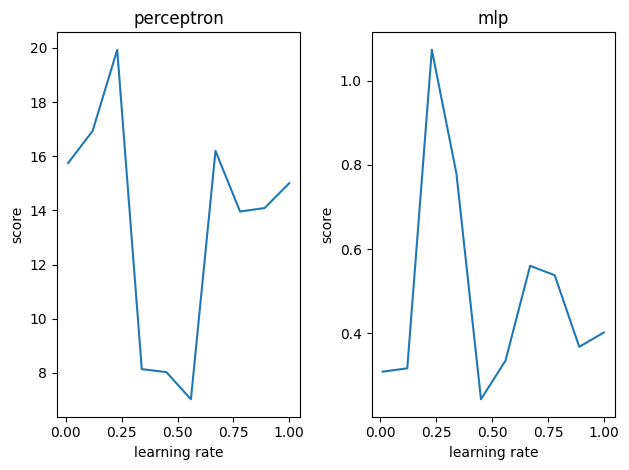

Лучшее значение learning_rate для перцептрона: 0.23
Лучшее значение learning_rate для многослойного перцептрона: 0.23


In [10]:
count_tests = 10

learning_rate_list = np.linspace(0.01, 1, count_tests)
perceptron_score, mlp_score = to_test(learning_rate_list, np.full(count_tests, 0.0001), np.full(count_tests, 'adam'))
draw_test(learning_rate_list, perceptron_score, mlp_score, 'learning rate')

print(f'Лучшее значение learning_rate для перцептрона: {learning_rate_list[np.argmax(perceptron_score)]}')
print(f'Лучшее значение learning_rate для многослойного перцептрона: {learning_rate_list[np.argmax(mlp_score)]}')

Параметр регуляризации (alpha).

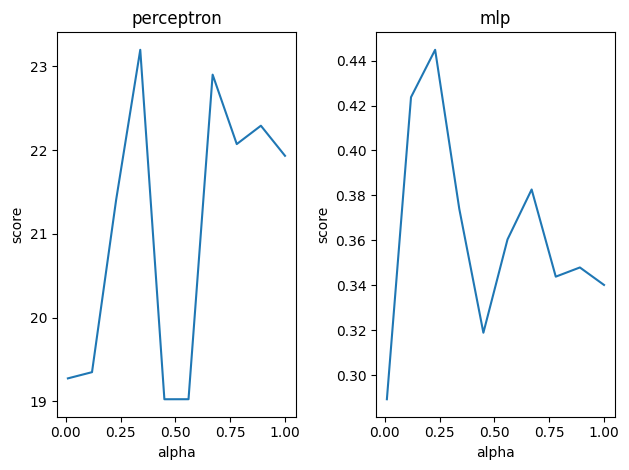

Лучшее значение alpha для перцептрона: 0.33340000000000003
Лучшее значение alpha для многослойного перцептрона: 0.2223


In [11]:
alpha_list = np.linspace(0.0001, 1, count_tests)
perceptron_score, mlp_score = to_test(np.full(count_tests, 0.001), alpha_list, np.full(count_tests, 'adam'))
draw_test(learning_rate_list, perceptron_score, mlp_score, 'alpha')
print(f'Лучшее значение alpha для перцептрона: {alpha_list[np.argmax(perceptron_score)]}')
print(f'Лучшее значение alpha для многослойного перцептрона: {alpha_list[np.argmax(mlp_score)]}')

Оптимизатор (solver, только для mlp).

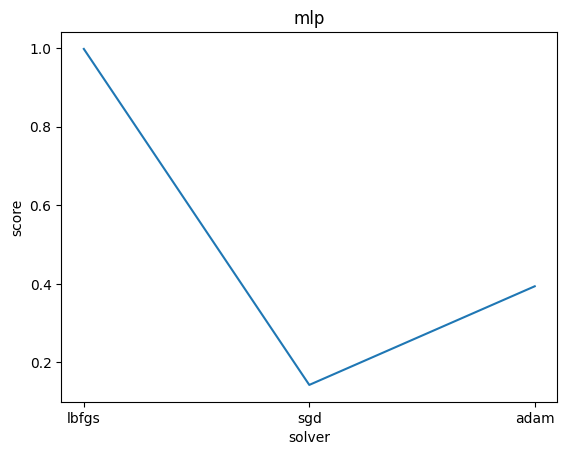

Лучший оптимизатор для многослойного перцептрона: lbfgs


In [12]:
optimizers_list = np.array(['lbfgs', 'sgd', 'adam'])
perceptron_score, mlp_score = to_test(np.full(len(optimizers_list), 0.001), np.full(len(optimizers_list), 0.0001), optimizers_list)

plt.plot(optimizers_list, mlp_score)
plt.title('mlp')
plt.xlabel('solver')
plt.ylabel('score')
plt.show()

print(f'Лучший оптимизатор для многослойного перцептрона: {optimizers_list[np.argmax(mlp_score)]}')